In [3]:
#path in functions will need to be changed to your system
from load_events import load_data
from event_vis import event_vis
from event_vis import peak_event_vis
from event_vis import defined_event_vis
from event_vis import defined_peak_event_vis
from poresize import poresize
from peaks import dpeak_finder
from pos2time import pos2time 
import pandas as pd 

### Pore Sizer Check

In [14]:
#change poresize code to include your own path
file='IV_ms2_march25'
poresize(file, 2,'licl')
#file name, #concentration, #salt
#take real part only

14.3864507529196 - 3.15544362088405e-21*I

### Loading files in

The file we are loading in is an hdf5 events file that should contain all the DNA translocation events through the nanopore during out measurement

In [15]:
file='dcas9_nomg_4M_11111_118_p2'

In [16]:
event_set=load_data(file)
# this will need to change based on the path you use on your computer
# go into the function file and create your own based on your path that you will put the files in

first check to make sure there are enough events and not too many if there are over 3,000 events then there was probably an issue with the first step detection and the noise in the nanopore measurement
Use the len command to do this!

In [17]:
len(event_set) 


1756

In [18]:
#event_vis(event_set) # this will print all the events

this is a good example because you can see in the middle alot of the 'events' are actually noise which is why we need to apply some filtering steps

In [19]:

h=0.015
t=-0.015
d=25
p=0.015 #adust down to detect smaller peaks
w=1 #Required width of peaks in samples, adjust to get rid of some low prominence peaks
wl=10 #ts rid of folds, go down

#remove comment
#peaks=dpeak_finder(event_set,h,t,d,p,w,wl)

read the function to learn about the parameters and play around with them, at the end of this notebook is an example where you can choose an event to play with to optomize them. 

In [20]:
len(peaks)

0

see much smaller number after the inital filtering !^
This code is basically just filtering for noise, later we can use the data it stores about peaks to try and filter more

In [21]:
#defined_event_vis(event_set,peaks.event)
#remove comment

still some events that aren't very good - for example:
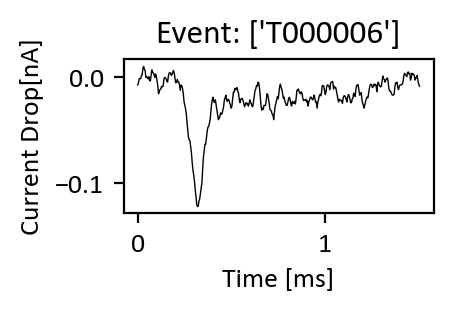

this event is only one peak and doesnt have our barcode so lets write some code to say that there needs to be atleast 2 peaks!

In [27]:
#cas9_peaks = peaks[peaks.mag2 != 0]
#remove comment

this is another filtering step to say there must be atleast 2 peaks
however, the peak counter isn't perfect, so using the example at the end of this document you can try and play around with values to find the peaks

In [28]:
#len(cas9_peaks)
#remove comment

In [25]:
#defined_event_vis(event_set,cas9_peaks.event)
#remove comment

Text(0.5, 1.0, "Event: ['T000008']")

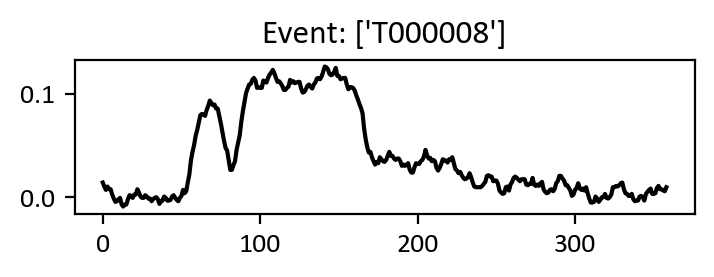

In [26]:

h=0.015
t=-0.015
d=25
p=0.015 #adust down to detect smaller peaks
w=1 #Required width of peaks in samples, adjust to get rid of some low prominence peaks
wl=12 #ts rid of folds, go down

from scipy.signal import find_peaks 
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'Calibri',
        'weight' : 'normal',
        'size'   : 10}



file=event_set
i = 'T000008'
current = file[i]['current_nA'][...]
x= -1*current
peaks, properties = find_peaks(x, height=h, threshold=t, distance=d, prominence=p, width=w, wlen=wl)
plt.figure(dpi=200, figsize=(4,1))
plt.style.use('default')
matplotlib.rc('font', **font)
plt.plot(x, color='black')
plt.plot(peaks, x[peaks], "x", color='red')
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"], ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"], xmax=properties["right_ips"], color = "C1")
#plt.plot(np.zeros_like(y), "--", color="gray")
plt.title("Event: " + str([i]))
#plt.show() #remove comment
